In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')

from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from io_functions import *
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
#from grids import *
from docking_analysis import *

/home/enf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
import io_functions
from imp import reload
reload(io_functions)
from io_functions import *

In [3]:
from operator import itemgetter

In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [5]:
from detect_intermediates import *
from interpret_tICs import *

In [6]:
from mor_h8_feature_types import *
from get_variable_names import *
from mor_h8_tica_config import *
from residue import Residue, Atom
ori_feature_name = copy.deepcopy(feature_name)

tm6_tm3_residues
[R279, R165]
[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 273, 274, 275, 276, 277, 278,

In [7]:
rho = 0.1
rho_string = "0pt1"
lag_time = 5
n_components = 2
n_clusters = 25

rho = 0.01
rho_string = "0pt01"
lag_time=50
ori_feature_name = copy.deepcopy(feature_name)

In [8]:
schemes = ["closest-heavy"]
feature_name = "%s-CA-py3-far_2" %ori_feature_name
#feature_name = "%s_phi_psi_chi2" %feature_name
(active_ref_dir, inactive_ref_dir, simulation_ref_dir, scripts_dir,
          ligand_dir, agonist_dir, inverse_agonist_dir, biased_agonist_dir, ref_receptors_dir, whole_trajectory_pnas,
          sasa_file) = get_base_files(base)

tica_dir = get_tica_dir(base, is_sparse, lag_time, n_components, feature_name, 
                                 wolf_string, shrinkage_string, rho_string)
#tica_dir = "%s-with-inactive" %tica_dir
tica_dir = "%s-backup" %tica_dir
ori_tica_dir = copy.deepcopy(tica_dir)
#tica_dir = "%s-normalized" % ori_tica_dir
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)


/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2
/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2


In [9]:
features_dir

'/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2'

In [10]:
from ipyparallel import Client
rc = Client()
print(len(rc.ids))
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))

225


<AsyncMapResult: chdir>

In [106]:
import custom_featurizer
reload (custom_featurizer)
from custom_featurizer import *
ibntxa_trajectories = [t for t in get_trajectory_files(traj_dir, ".h5") if "ibntxa" in t]
fix_chain_names(ibntxa_trajectories, None)
#featurize_contacts_custom(traj_dir, features_dir = features_dir, traj_ext = traj_ext, contact_residue_pairs_file = feature_residues_pkl, structures=[inactive_dir, active_dir], contact_residues=contact_residues,
#                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
#                          user_specified_atom_residue_pairs = [], load_from_file=False, worker_pool=None, schemes=schemes)

In [107]:
user_defined_features_dir = "%s/user_defined_features" %traj_dir
if not os.path.exists(user_defined_features_dir):
    os.makedirs(user_defined_features_dir)
compute_user_defined_features_wrapper(traj_dir, traj_ext, inactive_dir, active_dir, None,
                                        feature_name_residues_dict, user_defined_features_file, worker_pool=None, 
                                        save_dir=user_defined_features_dir, parallel=True, overwrite=False)

save_file = /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_17.dataset
save_file = /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_1.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_17.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_1.dataset
save_file = /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_134.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_134.dataset
save_file = /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_44.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_rep_44.dataset
save_file = /home/enf/md_simulations/MOR/h8_reimaged/trajectories/user_defined_features/apo_reseeded_rep_114.dataset
loading /home/enf/md_simulations/MOR/h8_rei

In [ ]:
ref_user_defined_features_file = "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5"
ref_user_defined_features_dir = "%s/ref_user_defined_features" %traj_dir
if not os.path.exists(ref_user_defined_features_dir):
    os.makedirs(ref_user_defined_features_dir)

compute_user_defined_features_wrapper(ref_receptors_dir, ".pdb", inactive_dir, active_dir, None,
                                        feature_name_residues_dict, ref_user_defined_features_file, worker_pool=None, 
                                        save_dir=ref_user_defined_features_dir, parallel=False, overwrite=True)

In [10]:
traj_dir = "/home/enf/md_simulations/MOR/h8_reimaged/trajectories"
traj_ext
print(sorted([n for n in get_trajectory_files(traj_dir, traj_ext) if ".h5" not in n]), end="")

[]

In [ ]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
featurize_contacts_custom(traj_dir, features_dir = features_dir, traj_ext = traj_ext, contact_residue_pairs_file = feature_residues_pkl, structures=[inactive_dir, active_dir], contact_residues=contact_residues,
                          residues_map = None, contact_cutoff = cutoff, parallel = True, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs = [], load_from_file=False, worker_pool=None, schemes=schemes, binarize=None, redo=False, within_turn=False, simulation_reference_filename=get_trajectory_files(traj_dir, traj_ext)[0])

already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already featurized
already feat

In [23]:
fit_normalizer(features_dir)

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_1.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_10.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_100.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_101.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_102.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_103.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_104.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2

In [11]:
import pickle
with open(feature_residues_pkl, "rb") as f:
    feature_residues = pickle.load(f)

In [12]:
[(feature_residues[i], i) for i in range(0,len(feature_residues)) if "TRP293" in str(feature_residues[i])]

[(ALA240 to TRP293, 104),
 (ASN150 to TRP293, 259),
 (ASN328 to TRP293, 304),
 (ASN332 to TRP293, 320),
 (ASP147 to TRP293, 366),
 (CYS321 to TRP293, 457),
 (GLY325 to TRP293, 534),
 (ILE155 to TRP293, 628),
 (ILE298 to TRP293, 713),
 (ILE322 to TRP293, 727),
 (LEU158 to TRP293, 794),
 (LEU324 to TRP293, 855),
 (MET151 to TRP293, 928),
 (PHE152 to TRP293, 1000),
 (PHE241 to TRP293, 1023),
 (SER154 to TRP293, 1080),
 (SER329 to TRP293, 1104),
 (TRP293 to TYR326, 1166),
 (TRP293 to VAL288, 1167)]

In [36]:
import custom_tica
reload(custom_tica)
from custom_tica import *
fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True, partial_fit=True)

loading feature files
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_1.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_1.dataset
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_10.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_10.dataset
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_100.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_100.dataset
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_101.dataset
loading /home/enf/md_simulations

In [13]:
tica_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components2all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2_regularization_wolf_autoShrinkage0pt01-backup'

In [123]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *

featurize_contacts_custom(ref_receptors_dir, features_dir = ref_features_dir, traj_ext = ".pdb", contact_residue_pairs_file = feature_residues_pkl, structures=[inactive_dir, active_dir], contact_residues=contact_residues,
                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs = [], load_from_file=False, worker_pool=None, schemes=schemes, within_turn=False, binarize=None, redo=False)

already featurized
already featurized
structure
/home/enf/md_simulations/MOR/4dkl_R_for_conformation.pdb
structure
None
mdraj_index_combinations[0:10]
[(41, 73), (41, 114), (41, 108), (41, 248), (41, 166), (41, 84), (41, 13), (41, 76), (41, 74), (41, 18)]
contact_features[0:10]
[[TYR106, ILE138], [TYR106, ARG179], [TYR106, VAL173], [TYR106, HIS319], [TYR106, LEU231], [TYR106, TYR149], [TYR106, VAL78], [TYR106, LYS141], [TYR106, LEU139], [TYR106, LEU83]]
About to compute 35255 features
(1, 35255)
cutoff
0.66
distances[0:10]
[[ 2.53460574  0.61586297  1.52706683 ...,  1.51371932  3.94720888
   2.2300899 ]]
There are 955 residue-residue contacts below cutoff in structure.
structure
/home/enf/md_simulations/MOR/5c1m.pdb
structure
None
mdraj_index_combinations[0:10]
[(54, 86), (54, 127), (54, 121), (54, 267), (54, 179), (54, 97), (54, 26), (54, 89), (54, 87), (54, 31)]
contact_features[0:10]
[[TYR106, ILE138], [TYR106, ARG179], [TYR106, VAL173], [TYR106, HIS319], [TYR106, LEU231], [TYR106, 

In [124]:
transform(existing_model = projection_operator_dir, features_directory = ref_features_dir, tica_dir = ref_tica_dir, normalizer=compat_verboseload("%s/normalizer.h5" %features_dir))


loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/phi_psi_chi2_allprot_tica_coords.h5"...
None
None
['/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far/reference_receptors/4dkl_R_for_conformation.dataset', '/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far/reference_receptors/5c1m.dataset']
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far/reference_receptors/5c1m.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far/reference_receptors/4dkl_R_for_conformation.dataset


In [ ]:
import custom_tica
reload(custom_tica)
from custom_tica import *
transform_to_h5(projection_operator_dir, features_dir, projected_features_dir, worker_pool=None, parallel=True, normalizer=compat_verboseload("%s/normalizer.h5" %features_dir))

In [14]:
tica_object = compat_verboseload(projection_operator_dir)

In [15]:
with open(projection_operator_dir, 'rb') as f:
    tica_object = pickle.load(f, encoding='latin1') 

In [16]:
#all_tica = compat_verboseload(projected_features_dir)
#all_tica = [x[:,range(1,10)] for x in all_tica]
#print(all_tica[0].shape)
#print(len(all_tica))
#verbosedump(all_tica, projected_features_dir)


In [17]:
#n_components=9

In [18]:
tica_object.timescales_

array([ 1247.21519721,  1031.03353331])

In [ ]:
plot_columns(tica_dir, projected_features_dir, titles = ["tIC%d" %j for j in range(1,11)], tICA = True, scale = 1.0, refcoords_file = None)

In [19]:
feature_indices = []
traj_basenames = get_trajectory_files(traj_dir, ".h5")
traj_basenames = [os.path.splitext(os.path.basename(t))[0] for t in traj_basenames]
feature_basenames = get_trajectory_files(features_dir, ".dataset")
feature_basenames = [os.path.splitext(os.path.basename(t))[0] for t in feature_basenames]
for i, traj_basename in enumerate(traj_basenames):
    if traj_basename in feature_basenames:
        feature_indices.append(int(i))

In [20]:
tica_coords = compat_verboseload(projected_features_dir)
pnas_coords = compat_verboseload(user_defined_features_file)
pnas_coords = [pnas_coords[i] for i in feature_indices]
tica_names = ["tIC.%d" %i for i in range(1,n_components+1)]
pnas_names = sorted(feature_name_residues_dict.keys())

IndexError: list index out of range

In [21]:
print(np.concatenate(tica_coords).shape)
print(np.concatenate(pnas_coords).shape)

(1146935, 2)
(772377, 15)


In [28]:
from plots import *

In [ ]:
plot_data_vs_data(np.concatenate(tica_coords), np.concatenate(pnas_coords), tica_names, pnas_names, analysis_dir)

In [22]:
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)

In [23]:
feature_names = compat_verboseload(feature_residues_pkl)

In [24]:
ref_features = [load_file(f) for f in get_trajectory_files(ref_features_dir, ".dataset")]
print(len(ref_features))
print(ref_features[0].shape)
print(ref_features[1].shape)
print(len(feature_names))
ref_features = pd.DataFrame(ref_features[0], columns=[str(f) for f in feature_names])

FileNotFoundError: [Errno 2] No such file or directory: '/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/reference_receptors'

In [25]:
#import interpret_tICs
#reload(interpret_tICs)
#from interpret_tICs import *
tic_components_dir = tica_dir
important_contact_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, feature_residues_pkl, n_tica_components=n_components, percentile=95)


Interpreting tIC 1
feature_importances_df.shape
(6, 5)
residue_importances_df.shape
(10, 2)
       feature_name   res_i   res_j  importance           feature
3  Leu339 To Val334  Leu339  Val334    0.327638  LEU339 to VAL334
4   Leu88 To Phe338   Leu88  Phe338    0.242554   LEU88 to PHE338
5   Phe338 To Phe84  Phe338   Phe84    0.179245   PHE338 to PHE84
0  Ile248 To Tyr336  Ile248  Tyr336    0.168266  ILE248 to TYR336
1  Ile256 To Val282  Ile256  Val282    0.152454  ILE256 to VAL282
2  Leu283 To Leu339  Leu283  Leu339   -0.089997  LEU283 to LEU339
Using dark_background
       residue  importance
Val334  Val334    0.327638
Leu339  Leu339    0.306756
Leu88    Leu88    0.242554
Phe338  Phe338    0.239389
Phe84    Phe84    0.179245
Tyr336  Tyr336    0.168266
Ile248  Ile248    0.168266
Val282  Val282    0.152454
Ile256  Ile256    0.152454
Leu283  Leu283   -0.089997
Using dark_background
Interpreting tIC 2
feature_importances_df.shape
(15, 5)
residue_importances_df.shape
(22, 2)
        feat

In [26]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
tic_subsampled_features_file = "%s/features_subsampled.pkl" % tica_dir
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
important_contact_features_pruned, important_contact_features_indices = find_non_zero_features(important_contact_features[0], feature_names)
if not os.path.exists(tic_subsampled_features_file):
    subsample_features(features_dir, important_contact_features_indices, important_contact_features_pruned, tic_subsampled_features_file)

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_152.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_1.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_28.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_205.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_rep_81.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_reseeded_rep_134.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/apo_reseeded_rep_188.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cuto

Process ForkPoolWorker-2:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-4:
Process ForkPoolWorker-12:
Process ForkPoolWorker-1:
Process ForkPoolWorker-10:
Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Process ForkPoolWorker-11:
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:


Traceback (most recent call last):
  File "/home/enf/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-d7daf92fff32>", line 9, in <module>
    subsample_features(features_dir, important_contact_features_indices, important_contact_features_pruned, tic_subsampled_features_file)
  File "/vspdata/vspcompute/home/enf/b2ar_analysis/conformation/interpret_tICs.py", line 543, in subsample_features
    subsampled_features = pool.map(subsample_partial, feature_files)
  File "/home/enf/anaconda3/lib/python3.5/multiprocessing/pool.py", line 260, in map
    return self._map_async(func, iterable, mapstar, chunksize).get()
  File "/home/enf/anaconda3/lib/python3.5/multiprocessing/pool.py", line 602, in get
    self.wait(timeout)
  File "/home/enf/anaconda3/lib/python3.5/multiprocessing/pool.py", line 599, in wait
    self._event.wait(timeout)
  File "/home/enf/anaconda3/lib/py

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



KeyboardInterrupt: 

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/bu72_rep_45.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2/bu72_rep_99.dataset


In [27]:
tic_subsampled_features_file

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components2all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2_regularization_wolf_autoShrinkage0pt01-backup/features_subsampled.pkl'

In [28]:
protein_top_features = load_file(tic_subsampled_features_file)
protein_top_features_concat = pd.concat(protein_top_features)

loading /home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components2all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2_regularization_wolf_autoShrinkage0pt01-backup/features_subsampled.pkl


FileNotFoundError: [Errno 2] No such file or directory: '/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components2all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2_regularization_wolf_autoShrinkage0pt01-backup/features_subsampled.pkl'

In [ ]:
plt.scatter(protein_top_features_concat["LEU158_CA to VAL285_CA"].values[::1000], protein_top_features_concat["PHE289 to TYR336"].values[::1000])
plt.show()

In [44]:
from ipyparallel import Client
rc = Client()
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))

print(len(rc.ids))


216


In [45]:
bu72_trajs = []
apo_trajs = []
trv130_trajs = []
suf_trajs = []
trv_trajs = []
ibntxa_trajs = []
trajs = get_trajectory_files(traj_dir, ".h5")
#trajs = [t for t in get_trajectory_files(traj_dir, traj_ext) if "apo_reimaged" not in t and "trv130" not in t]
for i, traj in enumerate(trajs):
    if "bu72" in traj or "CO" in traj or "Co" in traj:
        bu72_trajs.append(i)
    elif "apo" in traj:
        apo_trajs.append(i)
    elif "trv130" in traj:
        trv130_trajs.append(i)
    elif "suf" in traj:
        suf_trajs.append(i)
    elif "trv" in traj:
        trv_trajs.append(i)
    elif "ibntxa" in traj:
        ibntxa_trajs.append(i)

user_defined_coords = load_file(user_defined_features_file)

            

loading /home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5


In [47]:
bu72_pnas_file = "%s/bu72.h5" % whole_trajectory_pnas
apo_pnas_file = "%s/apo.h5" % whole_trajectory_pnas
trv130_pnas_file = "%s/trv130.h5" % whole_trajectory_pnas
suf_pnas_file = "%s/suf.h5" % whole_trajectory_pnas
ibntxa_pnas_file = "%s/ibntxa.h5" % whole_trajectory_pnas

In [46]:
bu72_pnas = [user_defined_coords[i] for i in bu72_trajs]
apo_pnas = [user_defined_coords[i] for i in apo_trajs]
trv130_pnas = [user_defined_coords[i] for i in trv130_trajs]
suf_pnas = [user_defined_coords[i] for i in suf_trajs]
ibntxa_pnas = [user_defined_coords[i] for i in ibntxa_trajs]

In [49]:
from imp import reload
import analysis
reload(analysis)
from analysis import *
import seaborn as sns
bu72_pnas_concatenated = np.concatenate(bu72_pnas)
print(np.shape(bu72_pnas_concatenated))
apo_pnas_concatenated = np.concatenate(apo_pnas)
#trv130_pnas_concatenated = np.concatenate(trv130_pnas)
suf_pnas_concatenated = np.concatenate(suf_pnas)
#ibntxa_pnas_concatenated = np.concatenate(ibntxa_pnas)

verbosedump(bu72_pnas, bu72_pnas_file)
verbosedump(apo_pnas, apo_pnas_file)
#verbosedump(trv130_pnas, trv130_pnas_file)
verbosedump(suf_pnas, suf_pnas_file)
#verbosedump(ibntxa_pnas, ibntxa_pnas_file)

bu72_pnas_dfs = [pd.DataFrame]


columns=sorted(feature_name_residues_dict.keys())
#plot_columns(whole_trajectory_pnas, bu72_pnas_file, titles=columns, main = "BU72", tICA = False, scale = 1.0, refcoords_file = None)
#plot_columns(whole_trajectory_pnas, apo_pnas_file, titles=columns, main = "Apo", tICA = False, scale = 1.0, refcoords_file = None)

#df = pd.DataFrame(bu72_pnas_concatenated, columns=sorted(feature_name_residues_dict.keys()))
#sns.jointplot(x="tm6_tm3_dist", y="rmsd_npxxy_inactive", data=df, kind="kde")
#plt.hexbin(bu72_pnas_concatenated[:,0], bu72_pnas_concatenated[:,2], cmap=plt.cm.YlOrRd_r)

(248499, 15)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"... (<class 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/apo.h5"... (<class 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/suf.h5"... (<class 'list'>)


In [50]:
#trv130_tica_file = "%s/trv130_tica.h5" % tica_dir
bu72_tica_file = "%s/bu72_tica.h5" % tica_dir
apo_tica_file = "%s/apo_tica.h5" % tica_dir
suf_tica_file = "%s/suf_tica.h5" % tica_dir

In [48]:
tica_coords = compat_verboseload(projected_features_dir)
trv130_tica = [tica_coords[i] for i in trv130_trajs]
bu72_tica = [tica_coords[i] for i in bu72_trajs]
apo_tica = [tica_coords[i] for i in apo_trajs]
suf_tica = [tica_coords[i] for i in suf_trajs]


verbosedump(trv130_tica, trv130_tica_file)
verbosedump(bu72_tica, bu72_tica_file)
verbosedump(apo_tica, apo_tica_file)
verbosedump(suf_tica, suf_tica_file)
verbosedump(oxy_tica, oxy_tica_file)

columns = ["tIC%d" %i for i in range(1,n_components+1)]
#plot_columns(tica_dir, bu72_tica_file, titles=columns, main = "BU72", tICA = False, scale = 1.0, refcoords_file = None)
#plot_columns(tica_dir, apo_tica_file, titles=columns, main = "Apo", tICA = False, scale = 1.0, refcoords_file = None)

NameError: name 'trv130_trajs' is not defined

In [85]:
bu72_feature_arrays = [np.hstack([tica_coords[i], protein_top_features[i]]) for i in bu72_trajs]
bu72_feature_dfs = [pd.DataFrame(feature_array, columns=["tIC.%d" %i for i in range(1, n_components+1)] + protein_top_features[0].columns.values.tolist()) for feature_array in bu72_feature_arrays]
bu72_feature_df = pd.concat(bu72_feature_dfs)

suf_feature_arrays = [np.hstack([tica_coords[i], protein_top_features[i]]) for i in suf_trajs]
suf_feature_dfs = [pd.DataFrame(feature_array, columns=["tIC.%d" %i for i in range(1, n_components+1)] + protein_top_features[0].columns.values.tolist()) for feature_array in suf_feature_arrays]
suf_feature_df = pd.concat(suf_feature_dfs)

apo_feature_arrays = [np.hstack([tica_coords[i], protein_top_features[i]]) for i in apo_trajs]
apo_feature_dfs = [pd.DataFrame(feature_array, columns=["tIC.%d" %i for i in range(1, n_components+1)] + protein_top_features[0].columns.values.tolist()) for feature_array in apo_feature_arrays]
apo_feature_df = pd.concat(apo_feature_dfs)

In [94]:
prop_deactivated_apo = float(apo_feature_df.loc[(apo_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (apo_feature_df["CYS159 to TYR336"] > 1.)].shape[0]) / float(apo_feature_df.shape[0])
prop_deactivated_apo

0.028561235714073364

In [95]:
prop_deactivated_bu72 = float(bu72_feature_df.loc[(bu72_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (bu72_feature_df["CYS159 to TYR336"] > 1.)].shape[0]) / float(bu72_feature_df.shape[0])
prop_deactivated_bu72

0.036732542183268345

In [96]:
prop_deactivated_suf = float(suf_feature_df.loc[(suf_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (suf_feature_df["CYS159 to TYR336"] > 1.)].shape[0]) / float(suf_feature_df.shape[0])
prop_deactivated_suf

0.006356126916671875

In [99]:
canonical_deactivation_apo = float(apo_feature_df.loc[(apo_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (apo_feature_df["CYS159 to TYR336"] > 1.) & (apo_feature_df["TRP293 to TYR326"] < 0.6)].shape[0]) / float(apo_feature_df.loc[(apo_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (apo_feature_df["CYS159 to TYR336"] > 1.)].shape[0])
canonical_deactivation_apo

0.9101858736059479

In [101]:
canonical_deactivation_bu72 = float(bu72_feature_df.loc[(bu72_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (bu72_feature_df["CYS159 to TYR336"] > 1.) & (bu72_feature_df["TRP293 to TYR326"] < 0.6)].shape[0]) / float(bu72_feature_df.loc[(bu72_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (bu72_feature_df["CYS159 to TYR336"] > 1.)].shape[0])
canonical_deactivation_bu72

0.9402936021034181

In [102]:
canonical_deactivation_suf = float(suf_feature_df.loc[(suf_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (suf_feature_df["CYS159 to TYR336"] > 1.) & (suf_feature_df["TRP293 to TYR326"] < 0.6)].shape[0]) / float(suf_feature_df.loc[(suf_feature_df["MET161_CA to VAL282_CA"] < 0.9) & (suf_feature_df["CYS159 to TYR336"] > 1.)].shape[0])
canonical_deactivation_suf

0.34875650665124347

(array([  1.00000000e+01,   4.80000000e+01,   1.03000000e+02,
          1.44000000e+02,   1.51000000e+02,   3.34000000e+02,
          1.51700000e+03,   6.26600000e+03,   1.54490000e+04,
          2.46240000e+04,   2.80530000e+04,   2.60540000e+04,
          2.11990000e+04,   1.70570000e+04,   1.35960000e+04,
          1.09100000e+04,   9.01900000e+03,   7.32600000e+03,
          6.15300000e+03,   5.17600000e+03,   4.39400000e+03,
          3.77000000e+03,   3.58800000e+03,   3.65600000e+03,
          4.17300000e+03,   4.99800000e+03,   6.03300000e+03,
          7.06100000e+03,   7.64200000e+03,   7.63700000e+03,
          6.89900000e+03,   5.61300000e+03,   4.19100000e+03,
          3.00700000e+03,   2.01800000e+03,   1.46600000e+03,
          9.70000000e+02,   6.43000000e+02,   4.11000000e+02,
          2.77000000e+02,   1.51000000e+02,   1.17000000e+02,
          5.70000000e+01,   3.70000000e+01,   1.60000000e+01,
          4.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

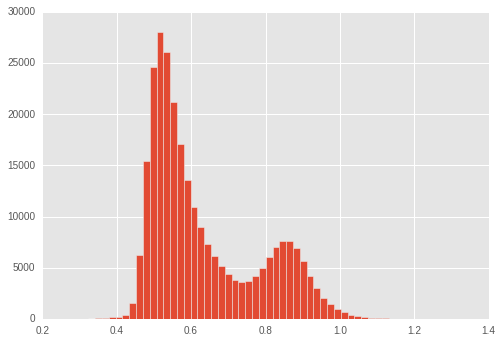

In [100]:
plt.hist(suf_feature_df["TRP293 to TYR326"], bins=50)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.40000000e+01,   5.41000000e+02,   3.39200000e+03,
          4.71600000e+03,   3.81200000e+03,   4.88500000e+03,
          1.59590000e+04,   3.52030000e+04,   3.85130000e+04,
          2.82250000e+04,   1.74090000e+04,   1.04480000e+04,
          6.95700000e+03,   5.09400000e+03,   4.28800000e+03,
          3.71700000e+03,   3.36800000e+03,   3.65000000e+03,
          4.65000000e+03,   5.68000000e+03,   6.57300000e+03,
          6.90400000e+03,   6.25600000e+03,   5.21600000e+03,
          3.83900000e+03,   2.60400000e+03,   1.56900000e+03,
          8.82000000e+02,   5.12000000e+02,   2.73000000e+02,
          1.32000000e+02,   5.90000000e+01,   3.30000000e+01,
          2.40000000e+01,   2.80000000e+01,   1.80000000e+01,
        

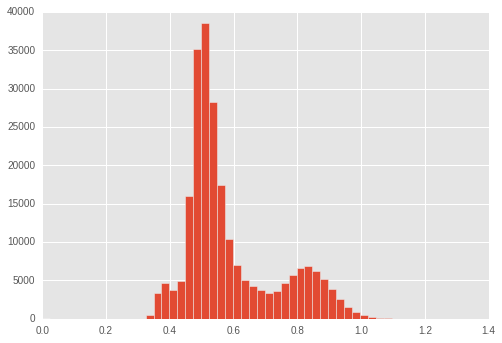

In [97]:
plt.hist(apo_feature_df["TRP293 to TYR326"], bins=50)

(array([  3.00000000e+00,   6.00000000e+00,   1.30000000e+01,
          1.10000000e+01,   3.50000000e+01,   5.20000000e+01,
          7.60000000e+01,   1.00000000e+02,   1.06000000e+02,
          1.68000000e+02,   2.42000000e+02,   4.13000000e+02,
          7.60000000e+02,   1.35900000e+03,   2.23000000e+03,
          3.45100000e+03,   5.03800000e+03,   7.11400000e+03,
          9.12000000e+03,   1.12270000e+04,   1.38170000e+04,
          1.53570000e+04,   1.65490000e+04,   1.76410000e+04,
          1.73630000e+04,   1.67880000e+04,   1.55110000e+04,
          1.41100000e+04,   1.25390000e+04,   1.07540000e+04,
          9.13600000e+03,   7.77100000e+03,   6.94600000e+03,
          6.31100000e+03,   5.79200000e+03,   5.16900000e+03,
          4.69200000e+03,   3.71100000e+03,   2.76500000e+03,
          1.86700000e+03,   1.13400000e+03,   6.13000000e+02,
          3.16000000e+02,   1.63000000e+02,   7.60000000e+01,
          4.40000000e+01,   2.40000000e+01,   6.00000000e+00,
        

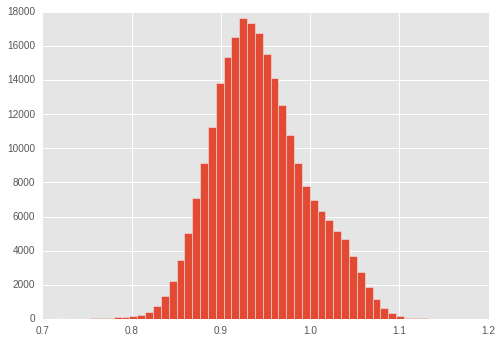

In [83]:
plt.hist(bu72_feature_df["ALA240 to TRP293"], bins=50)

In [68]:
for f in bu72_feature_arrays:
    print(f.shape)

(453, 152)
(437, 152)
(373, 152)
(460, 152)
(440, 152)
(440, 152)
(28, 152)
(440, 152)
(462, 152)
(386, 152)
(412, 152)
(422, 152)
(406, 152)
(386, 152)
(389, 152)
(29, 152)
(405, 152)
(417, 152)
(415, 152)
(401, 152)
(423, 152)
(422, 152)
(400, 152)
(490, 152)
(397, 152)
(378, 152)
(441, 152)
(431, 152)
(423, 152)
(329, 152)
(411, 152)
(401, 152)
(399, 152)
(363, 152)
(470, 152)
(375, 152)
(431, 152)
(408, 152)
(396, 152)
(401, 152)
(420, 152)
(414, 152)
(352, 152)
(356, 152)
(443, 152)
(446, 152)
(380, 152)
(386, 152)
(392, 152)
(456, 152)
(448, 152)
(29, 152)
(186, 152)
(400, 152)
(433, 152)
(388, 152)
(468, 152)
(386, 152)
(370, 152)
(418, 152)
(355, 152)
(420, 152)
(379, 152)
(429, 152)
(373, 152)
(419, 152)
(408, 152)
(491, 152)
(405, 152)
(411, 152)
(396, 152)
(431, 152)
(428, 152)
(388, 152)
(416, 152)
(387, 152)
(417, 152)
(421, 152)
(420, 152)
(447, 152)
(412, 152)
(343, 152)
(333, 152)
(402, 152)
(420, 152)
(375, 152)
(426, 152)
(383, 152)
(425, 152)
(32, 152)
(431, 152)
(33

In [52]:
#print(np.concatenate(trv130_tica).shape)
print(np.concatenate(apo_tica).shape)
print(np.concatenate(bu72_tica).shape)
print(np.concatenate(suf_tica).shape)


(235459, 10)
(248499, 10)
(272021, 10)


In [29]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *
n_clusters = 25
clusterer_dir = "%s/clusterer_%dclusters.h5" %(tica_dir, n_clusters)
if not os.path.exists(clusterer_dir):
    cluster_minikmeans(tica_dir, projected_features_dir, traj_dir, n_clusters=n_clusters, clusterer_dir=clusterer_dir)

In [30]:
print(clusterer_dir)

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components2all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2_regularization_wolf_autoShrinkage0pt01-backup/clusterer_25clusters.h5


In [55]:
trv130_clusterer_file = "%s/trv130_clusterer%d.h5" %(tica_dir, n_clusters)
bu72_clusterer_file = "%s/bu72_clusterer%d.h5" %(tica_dir, n_clusters)
apo_clusterer_file = "%s/apo_clusterer%d.h5" %(tica_dir, n_clusters)
suf_clusterer_file = "%s/suf_clusterer%d.h5" %(tica_dir, n_clusters)



In [56]:
clusterer = compat_verboseload(clusterer_dir)
cluster_labels = clusterer.labels_
#trv130_clusters = [cluster_labels[i] for i in trv130_trajs]
bu72_clusters = [cluster_labels[i] for i in bu72_trajs]
apo_clusters = [cluster_labels[i] for i in apo_trajs]
suf_clusters = [cluster_labels[i] for i in suf_trajs]



bu72_clusterer = copy.deepcopy(clusterer)
bu72_clusterer.labels_ = bu72_clusters
#if not os.path.exists(bu72_clusterer_file):
verbosedump(bu72_clusterer, bu72_clusterer_file)

apo_clusterer = copy.deepcopy(clusterer)
apo_clusterer.labels_ = apo_clusters
    
#if not os.path.exists(apo_clusterer_file):
verbosedump(apo_clusterer, apo_clusterer_file)

#trv130_clusterer = copy.deepcopy(clusterer)
#trv130_clusterer.labels_ = trv130_clusters
    
#if not os.path.exists(trv130_clusterer_file):
#verbosedump(trv130_clusterer, trv130_clusterer_file)

suf_clusterer = copy.deepcopy(clusterer)
suf_clusterer.labels_ = suf_clusters
    
#if not os.path.exists(trv130_clusterer_file):
verbosedump(suf_clusterer, suf_clusterer_file)

Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_clusterer100.h5"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/apo_clusterer100.h5"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_clusterer100.h5"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)


In [57]:
cluster_tica_averages = calculate_cluster_averages_per_feature(bu72_clusterer, bu72_tica)
cluster_tica_averages = pd.DataFrame(cluster_tica_averages, columns=["tIC.%d" %i for i in range(1, n_components+1)])



In [58]:
intermediate_actives = cluster_tica_averages.loc[(cluster_tica_averages["tIC.2"] > 0.7) & (cluster_tica_averages["tIC.2"] < 1.2) & (cluster_tica_averages["tIC.5"] > 0.) & (cluster_tica_averages["tIC.2"] < 0.8)]
intermediate_actives

,tIC.1,tIC.2,tIC.3,tIC.4,tIC.5,tIC.6,tIC.7,tIC.8,tIC.9,tIC.10


In [59]:
import custom_msm
reload(custom_msm)
from custom_msm import *
from msm_resampled import *

In [60]:
apo_clusters_map = make_clusters_map(apo_clusterer)
bu72_clusters_map = make_clusters_map(bu72_clusterer)
#trv130_clusters_map = make_clusters_map(trv130_clusterer)
suf_clusters_map = make_clusters_map(suf_clusterer)

3786
5239
0
1540
6118
1123
2304
0
19882
1
168
4332
1
0
14
4305
1451
0
824
1
7569
2104
1988
212
5920
0
834
2732
1667
48
98
30
15785
6980
10
3360
3386
1368
4371
0
2109
1211
4904
32
3116
24
1662
6596
0
310
225
5173
1067
1458
13
0
49
6498
5043
1
765
146
1
1526
3071
325
12411
7735
6012
13414
1946
0
1020
13005
971
8
970
562
0
0
4436
479
7841
0
0
10
13
39
1
104
123
0
538
3472
0
0
5469
1
0
3
16284
16035
0
472
236
791
3077
5579
5182
3610
0
0
2
0
0
251
3662
0
2276
0
37
2134
0
0
3875
3
13544
4382
33
2
350
2
14405
1161
0
11135
8905
71
12
0
0
115
3225
779
2181
17
216
0
0
13
1
2895
64
164
437
4
0
5685
11333
0
5442
3408
0
11
9210
1167
12707
1823
316
5432
196
0
2159
16282
333
0
0
8533
9433
1
1600
150
9448
0
4984
5
78
46
3
0
8
0
2621
4212
0
3
4201
0
0
50
166
1643
7055
6838
392
51
10428
0
739
3
3656
145
2206
3389
7849
324
5331
7722
249
13523
234
306
0
2490
3263
3400
0
243
116
7344
6094
2998
550
132
2258
712
374
1253
2923
1247
0
381
388
3
280
4453
9806
42
4547
990
9968
1034
4582
1621
639
2403
1710
739
23

In [ ]:
plt.clf()
plot_timescales(apo_clusterer_file, n_clusters, tica_dir, main="Apo MSM Timescales", lag_times=list(range(1,51,10)))

In [ ]:
plt.clf()
import custom_msm
reload(custom_msm)
from custom_msm import *
plot_timescales(bu72_clusterer_file, n_clusters, tica_dir, main="BU72 MSM Timescales", lag_times=[1,5,10,15,20])

In [ ]:
plt.clf()
plot_timescales(suf_clusterer_file, n_clusters, tica_dir, main="SUF MSM Timescales", lag_times=list(range(1,51,10)))

In [48]:
import custom_msm
import importlib
importlib.reload(custom_msm)
from custom_msm import *

apo_lag_time=25.
prior_counts = 1e-5
ergodic_cutoff = 'off'
apo_msm_dir = os.path.join(tica_dir, "apo_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(apo_lag_time, str(prior_counts), n_clusters))
#if 1==1:
if not os.path.exists(apo_msm_dir):
    apo_msm = build_msm(apo_clusterer_file, apo_lag_time, apo_msm_dir, prior_counts, ergodic_cutoff)
else:
    apo_msm = compat_verboseload(apo_msm_dir)

import msm_resampled
reload(msm_resampled)
from msm_resampled import *
total_samples = 20000
num_trajs = len(apo_trajs)
apo_resampled_traj_to_frames_file = os.path.join(tica_dir, "apo_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(apo_lag_time, str(prior_counts), n_clusters, total_samples))
#if not os.path.exists(apo_resampled_traj_to_frames_file):
apo_resampled_traj_to_frames = resample_by_msm(total_samples, apo_msm, apo_clusters_map, num_trajs, apo_resampled_traj_to_frames_file)
#else:
apo_resampled_traj_to_frames = compat_verboseload(apo_resampled_traj_to_frames_file)

apo_pnas = compat_verboseload(apo_pnas_file)
apo_pnas_resampled_file = os.path.join(tica_dir, "apo_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(apo_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(apo_pnas, apo_resampled_traj_to_frames, apo_pnas_resampled_file)
apo_pnas_resampled = compat_verboseload(apo_pnas_resampled_file)

tica_concatenated = np.concatenate(compat_verboseload(projected_features_dir))
tica_axes = [(np.min(tica_concatenated[:,i]), np.max(tica_concatenated[:,i])) for i in range(0, np.shape(tica_concatenated)[1])]

apo_tica = compat_verboseload(apo_tica_file)
apo_tica_resampled_file = os.path.join(tica_dir, "apo_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(apo_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(apo_tica, apo_resampled_traj_to_frames, apo_tica_resampled_file)
apo_tica_resampled = compat_verboseload(apo_tica_resampled_file)

apo_clusterer = compat_verboseload(apo_clusterer_file)
apo_msm = compat_verboseload(apo_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = apo_msm.populations_

for cluster_id in apo_msm.mapping_.keys():
    state_id = apo_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)

#plot_all_tics_and_clusters(tica_dir, apo_tica_resampled_file, apo_clusterer_file, lag_time, tic_range=range(0,n_components), main = "Apo_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

#plot_columns(tica_dir, apo_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_Apo_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=False)

Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/apo_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (<class 'dict'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/apo_pnas_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (<class 'numpy.ndarray'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/apo_tica_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (

In [6]:
print(np.concatenate(suf_tica).shape)
print(np.concatenate(suf_pnas).shape)

NameError: name 'np' is not defined

In [ ]:
sorted(feature_name_residues_dict.keys())

In [ ]:
plt.hexbin(apo_tica_resampled[:,2], apo_tica_resampled[:,9])
plt.show()

In [ ]:
apo_tica_resampled.shape

In [ ]:
plt.scatter(bu72_tica_resampled[:,2], bu72_tica_resampled[:,9])
plt.show()

In [ ]:
bu72_msm.timescales_

In [119]:
np.concatenate(ibntxa_pnas).shape

(16398, 15)

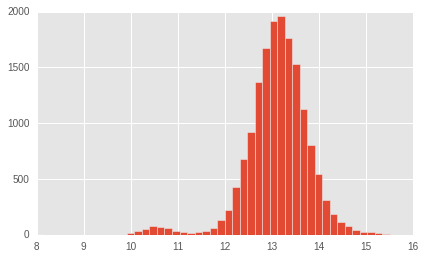

In [122]:
plt.clf()
plt.hist(np.concatenate(ibntxa_pnas)[:,-3], bins=50, range=[8,16])
plt.show()

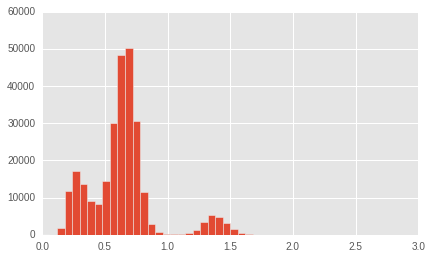

In [121]:
plt.clf()
plt.hist(np.concatenate(suf_pnas)[:,-7], bins=50, range=[0,3])
plt.show()

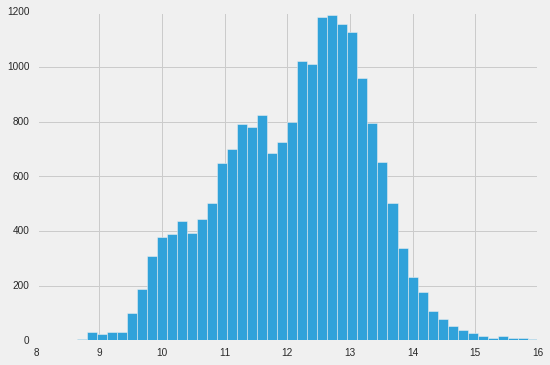

In [85]:
plt.clf()
plt.hist(suf_pnas_resampled[:,-3],bins=50, range=[8,16])
plt.show()

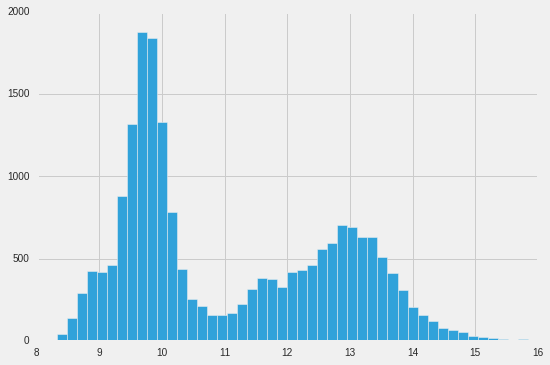

In [79]:
plt.clf()
plt.hist(bu72_pnas_resampled[:,-3],bins=50, range=[8,16])
plt.show()

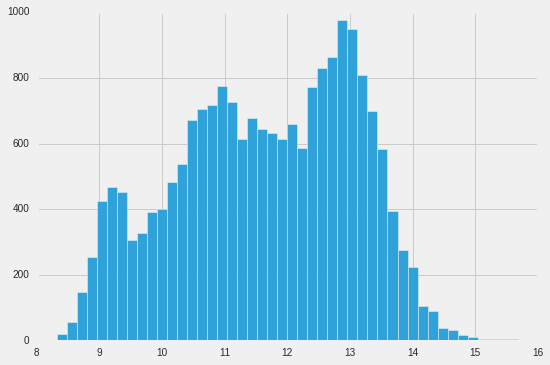

In [80]:
plt.clf()
plt.hist(apo_pnas_resampled[:,-3],bins=50, range=[8,16])
plt.show()

In [5]:
plt.clf()
plt.hist(suf_pnas_resampled[:,-3],bins=50, range=[8,16])
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.clf()
plt.hist(bu72_tica_resampled[:,-3],bins=50, range=4,6])
plt.show()

In [ ]:
plt.clf()
plt.hist(apo_tica_resampled[:,2],bins=50, range=[-4,6])
plt.show()

In [49]:

bu72_lag_time=25
prior_counts = 1e-5
ergodic_cutoff='off'
bu72_msm_dir = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters))
#if 1==1:
if not os.path.exists(bu72_msm_dir):
    bu72_msm = build_msm(bu72_clusterer_file, bu72_lag_time, bu72_msm_dir, prior_counts, ergodic_cutoff)
else:
    bu72_msm = compat_verboseload(bu72_msm_dir)

import msm_resampled
reload(msm_resampled)
from msm_resampled import *
total_samples = 20000
num_trajs = len(bu72_trajs)
bu72_resampled_traj_to_frames_file = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
#if not os.path.exists(bu72_resampled_traj_to_frames_file):
bu72_resampled_traj_to_frames = resample_by_msm(total_samples, bu72_msm, bu72_clusters_map, num_trajs, bu72_resampled_traj_to_frames_file)
#else:
bu72_resampled_traj_to_frames = compat_verboseload(bu72_resampled_traj_to_frames_file)

bu72_pnas = compat_verboseload(bu72_pnas_file)
bu72_pnas_resampled_file = os.path.join(tica_dir, "bu72_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_pnas, bu72_resampled_traj_to_frames, bu72_pnas_resampled_file)
bu72_pnas_resampled = compat_verboseload(bu72_pnas_resampled_file)

tica_concatenated = np.concatenate(compat_verboseload(projected_features_dir))
tica_axes = [(np.min(tica_concatenated[:,i]), np.max(tica_concatenated[:,i])) for i in range(0, np.shape(tica_concatenated)[1])]

bu72_tica = compat_verboseload(bu72_tica_file)
bu72_tica_resampled_file = os.path.join(tica_dir, "bu72_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_tica, bu72_resampled_traj_to_frames, bu72_tica_resampled_file)
bu72_tica_resampled = compat_verboseload(bu72_tica_resampled_file)

bu72_clusterer = compat_verboseload(bu72_clusterer_file)
bu72_msm = compat_verboseload(bu72_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = bu72_msm.populations_

for cluster_id in bu72_msm.mapping_.keys():
    state_id = bu72_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)
    
#plot_all_tics_and_clusters(tica_dir, bu72_tica_resampled_file, bu72_clusterer_file, lag_time, tic_range=range(0,n_components), main = "bu72_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

#plot_columns(tica_dir, bu72_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_bu72_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=False)

Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (<class 'dict'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_pnas_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (<class 'numpy.ndarray'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_tica_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"..

In [ ]:
plt.clf()
plt.hist(np.concatenate(bu72_pnas)[:,8], bins=50)
plt.show()

In [ ]:
bu72_pnas_averages = calculate_cluster_averages_per_feature(bu72_clusterer, bu72_pnas)
len(sorted(list(set(np.concatenate(bu72_clusterer.labels_)))))
print(np.sum(bu72_msm.populations_[np.concatenate(bu72_msm.transform(np.where(bu72_pnas_averages[:,8] > 12.)[0]))]))
print(np.sum(bu72_msm.populations_[np.concatenate(bu72_msm.transform(np.where(bu72_pnas_averages[:,8] < 12.)[0]))]))

In [ ]:
apo_pnas_averages = calculate_cluster_averages_per_feature(apo_clusterer, apo_pnas)
len(sorted(list(set(np.concatenate(apo_clusterer.labels_)))))
print(np.sum(apo_msm.populations_[np.concatenate(apo_msm.transform(np.where(apo_pnas_averages[:,8] > 12.)[0]))]))
print(np.sum(apo_msm.populations_[np.concatenate(apo_msm.transform(np.where(apo_pnas_averages[:,8] < 12.)[0]))]))

In [ ]:
apo_pnas_averages = calculate_cluster_averages_per_feature(apo_clusterer, apo_pnas)
sorted(list(set(np.concatenate(apo_clusterer.labels_))))

In [ ]:
np.sum(apo_msm.populations_[np.concatenate(apo_msm.partial_transform(list(set(np.concatenate(apo_clusterer.labels_)))))])

In [ ]:
apo_msm.partial_transform(list(set(np.concatenate(apo_clusterer.labels_))))

In [ ]:
apo_msm.partial_transform(np.array(list(set(np.concatenate(apo_clusterer.labels_)))))

In [ ]:
plt.clf()
plt.hist(np.concatenate(apo_pnas)[:,8], bins=50, range=[6,18.])
plt.show()

In [ ]:
graph_file = "%s/bu72_clusters_%d_msm_lag_time%d_graph.graphml" % (tica_dir, n_clusters, bu72_lag_time)
bu72_tica_averages = calculate_cluster_averages_per_feature(bu72_clusterer, bu72_tica)
bu72_cluster_attributes = {}
for i, title in enumerate(["tIC.%d" %i for i in range(1,n_components+1)]):
    bu72_cluster_attributes[title] = bu72_tica_averages[:,i]

bu72_msm_attributes = {'eq_pops' : bu72_msm.populations_}
construct_graph(bu72_msm_dir, bu72_clusterer_file, n_clusters, 5, 5, graph_file, inactive = None, active = None, pnas_clusters_averages = None, tica_clusters_averages = None, docking=None, macrostate = None, cluster_attributes=bu72_cluster_attributes, msm_attributes=bu72_msm_attributes)

In [ ]:
suf_msm_dir

In [50]:
suf_lag_time=25
prior_counts = 1e-5
ergodic_cutoff='off'
suf_msm_dir = os.path.join(tica_dir, "suf_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(suf_lag_time, str(prior_counts), n_clusters))
if not os.path.exists(suf_msm_dir):
    suf_msm = build_msm(suf_clusterer_file, suf_lag_time, suf_msm_dir, prior_counts, ergodic_cutoff)
else:
    suf_msm = compat_verboseload(suf_msm_dir)

import msm_resampled
reload(msm_resampled)
from msm_resampled import *
total_samples = 20000
num_trajs = len(suf_trajs)
suf_resampled_traj_to_frames_file = os.path.join(tica_dir, "suf_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(suf_lag_time, str(prior_counts), n_clusters, total_samples))
#if not os.path.exists(suf_resampled_traj_to_frames_file):
suf_resampled_traj_to_frames = resample_by_msm(total_samples, suf_msm, suf_clusters_map, num_trajs, suf_resampled_traj_to_frames_file)
#else:
suf_resampled_traj_to_frames = compat_verboseload(suf_resampled_traj_to_frames_file)

suf_pnas = compat_verboseload(suf_pnas_file)
suf_pnas_resampled_file = os.path.join(tica_dir, "suf_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(suf_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(suf_pnas, suf_resampled_traj_to_frames, suf_pnas_resampled_file)
suf_pnas_resampled = compat_verboseload(suf_pnas_resampled_file)

tica_concatenated = np.concatenate(compat_verboseload(projected_features_dir))
tica_axes = [(np.min(tica_concatenated[:,i]), np.max(tica_concatenated[:,i])) for i in range(0, np.shape(tica_concatenated)[1])]

suf_tica = compat_verboseload(suf_tica_file)
suf_tica_resampled_file = os.path.join(tica_dir, "suf_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(suf_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(suf_tica, suf_resampled_traj_to_frames, suf_tica_resampled_file)
suf_tica_resampled = compat_verboseload(suf_tica_resampled_file)

suf_clusterer = compat_verboseload(suf_clusterer_file)
suf_msm = compat_verboseload(suf_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = suf_msm.populations_

for cluster_id in suf_msm.mapping_.keys():
    state_id = suf_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)
    
#plot_all_tics_and_clusters(tica_dir, suf_tica_resampled_file, suf_clusterer_file, lag_time, tic_range=range(0,n_components), main = "suf_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

#plot_columns(tica_dir, suf_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_suf_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=False)

Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (<class 'dict'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_pnas_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (<class 'numpy.ndarray'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_tica_msm_lag-time25_prior-counts1e-05_clusters1000_resampled_20000.h5"... (

In [ ]:
suf_resampled_traj_to_frames_file

In [ ]:
plot_columns(tica_dir, apo_pnas_resampled_file, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_Apo_MSM_", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False, reshape=True)

In [ ]:
bu72_lag_time=25
prior_counts = 0.0
bu72_msm_dir = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters))
if not os.path.exists(bu72_msm_dir):
    bu72_msm = build_msm(bu72_clusterer_file, bu72_lag_time, bu72_msm_dir, prior_counts)
else:
    bu72_msm = compat_verboseload(bu72_msm_dir)
bu72_msm.timescales_

In [ ]:
fixed_assignments = dict()
for i, traj in enumerate(bu72_clusterer.labels_):
    fixed_assignments[i] = bu72_msm.transform(traj)

In [ ]:
fixed_assignments[0]

In [ ]:
print("hello")

In [ ]:
def pop_vs_counts(msm_obj, fixed_assignments, ax,**kwargs):

    pop_count_vect=[]
    for i in range(msm_obj.n_states_):
        pop_count_vect.append(np.sum([np.count_nonzero(fixed_assignments[j]==i)
                                      for j in fixed_assignments.keys()]))
    pop_count_vect = pop_count_vect/np.sum(pop_count_vect)
    ax.errorbar(np.log10(msm_object.populations_),np.log10(pop_count_vect),**kwargs)
    ax.plot([0,-6],[0,-6])
    ax.set_ylim([-6,0])
    ax.set_xlim([-6,0])
    ax.set_xlabel(" MSM Population",size=16)
    ax.set_ylabel("Counts Population",size=16)
    return pop_count_vect
f=figure()
ax=f.add_subplot(1,1,1)
pop_count_vect = pop_vs_counts(bu72_msm, fixed_assignments, ax fmt='o', color='r',label="RCSB-ASP")
ax.legend(loc='best',prop={'size':12})

In [ ]:
total_samples = 20000
num_trajs = len(bu72_trajs)
bu72_resampled_traj_to_frames_file = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
if not os.path.exists(bu72_resampled_traj_to_frames_file):
    bu72_resampled_traj_to_frames = resample_by_msm(total_samples, bu72_msm, bu72_clusters_map, num_trajs, bu72_resampled_traj_to_frames_file)
else:
    bu72_resampled_traj_to_frames = compat_verboseload(bu72_resampled_traj_to_frames_file)

In [4]:
bu72_resampled_traj_to_frames_file

NameError: name 'bu72_resampled_traj_to_frames_file' is not defined

In [ ]:
bu72_pnas = compat_verboseload(bu72_pnas_file)
bu72_pnas_resampled_file = os.path.join(tica_dir, "bu72_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_pnas, bu72_resampled_traj_to_frames, bu72_pnas_resampled_file)
bu72_pnas_resampled = compat_verboseload(bu72_pnas_resampled_file)

In [ ]:
bu72_tica = compat_verboseload(bu72_tica_file)
bu72_tica_resampled_file = os.path.join(tica_dir, "bu72_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_tica, bu72_resampled_traj_to_frames, bu72_tica_resampled_file)
bu72_tica_resampled = compat_verboseload(bu72_tica_resampled_file)

In [ ]:
bu72_clusterer = compat_verboseload(bu72_clusterer_file)
bu72_msm = compat_verboseload(bu72_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = bu72_msm.populations_

for cluster_id in bu72_msm.mapping_.keys():
    state_id = bu72_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)
    
plot_all_tics_and_clusters(tica_dir, bu72_tica_resampled_file, bu72_clusterer_file, lag_time, tic_range=range(0,10), main = "bu72_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

In [ ]:
bu72_pnas_file

In [ ]:
analysis_dir

In [ ]:
tica_resampled = np.vstack([compat_verboseload(bu72_pnas_resampled_file)[::1,], compat_verboseload(apo_pnas_resampled_file)[::1,], compat_verboseload(suf_pnas_resampled_file)[::1,]])
mins = np.min(tica_resampled, axis=0)
maxs = np.max(tica_resampled, axis=0)
stds = np.std(tica_resampled, axis=0)
custom_lims = [[mins[i] - .5*stds[i], maxs[i] + .5*stds[i]] for i in range(0,len(mins))]

In [ ]:
ref_pnas = load_file("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5")
ref_pnas = np.hstack([np.array(x).T for x in ref_pnas])

In [52]:
def get_features(features_dir):
    feature_files = get_trajectory_files(features_dir, ".dataset")
    features = np.vstack([load_file(f) for f in feature_files])
    print(features.shape)
    return features

ref_pp_features = pd.DataFrame(get_features(ref_features_dir), columns=feature_names)

ref_pp_tica = pd.read_csv(ref_tica_coords, header=None).values
#ref_pp_tica.columns = ["mOR tIC.%d" %i for i in range(1,ref_pp_tica.shape[1])]

ref_pnas = load_file("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5")
ref_pnas = np.hstack([np.array(x).T for x in ref_pnas])

#ref_pnas = pd.DataFrame(ref_pnas, columns=sorted(feature_name_residues_dict.keys()))

#ref_features = pd.concat([ref_pp_features*10., ref_lp_features*10., ref_pp_tica, ref_lp_tica, ref_pnas], axis=1)

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far/reference_receptors/4dkl_R_for_conformation.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far/reference_receptors/5c1m.dataset
(2, 2408)
loading /home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5


In [ ]:
coords_bounds_dict = {"tIC.4": [(8.0, 10.), (12., 15.)]}
all_traj_files = get_trajectory_files(traj_dir, traj_ext)
trajs_to_watch = reaction_coordinate_sampler([all_traj_files[i] for i in bu72_trajs], ".h5", [t.values for t in all_traj_features], 
                            all_traj_features[0].columns.values.tolist(), coords_bounds_dict, 
                            "%s/trajs_to_watch.csv" %pp_tica_dir)

In [3]:
ref_pp_tica

NameError: name 'ref_pp_tica' is not defined

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
jointplots(bu72_pnas_resampled[::1,:], analysis_dir, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_BU72_MSM_%d_Clusters" %n_clusters, refcoords = ref_pnas, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=3., custom_lims=custom_lims, n_levels=15, n_pts=200j, parallel=True, remake=True)

In [ ]:
ref_pnas

In [ ]:
jointplots(apo_pnas_resampled[::1,:], analysis_dir, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_APO_MSM_%d_Clusters" %n_clusters, refcoords=ref_pnas, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=3., custom_lims=custom_lims, n_levels=10, remake=True)

In [ ]:
jointplots(suf_pnas_resampled[::1,:], analysis_dir, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_SUF_MSM_%d_Clusters" %n_clusters, refcoords=ref_pnas, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=3., custom_lims=custom_lims, n_levels=10, remake=True)

In [54]:
tica_resampled = np.vstack([compat_verboseload(bu72_tica_resampled_file)[::1,], compat_verboseload(apo_tica_resampled_file)[::1,], compat_verboseload(suf_tica_resampled_file)[::1,]])
mins = np.min(tica_resampled, axis=0)
maxs = np.max(tica_resampled, axis=0)
stds = np.std(tica_resampled, axis=0)
custom_lims = [[mins[i] - 1.*stds[i], maxs[i] + 1.*stds[i]] for i in range(0,len(mins))]


In [ ]:
custom_lims

In [ ]:
print(custom_lims)
print(custom_lims[3][1])

In [55]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
refcoords_jointplots_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(refcoords_jointplots_dir):
    os.makedirs(refcoords_jointplots_dir)
jointplots(compat_verboseload(bu72_tica_resampled_file)[::1,:], refcoords_jointplots_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "BU72 MSM", refcoords=ref_pp_tica, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=10, min_density=None, max_diff=8., custom_lims=custom_lims, n_pts=200j, n_levels=15, remake=False, parallel=False, max_i=1)
jointplots(compat_verboseload(apo_tica_resampled_file)[::1,:], refcoords_jointplots_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Apo MSM", refcoords=ref_pp_tica, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=10, min_density=None, max_diff=8., custom_lims=custom_lims, n_pts=200j, n_levels=15, remake=False, parallel=False, max_i=1)
jointplots(compat_verboseload(suf_tica_resampled_file)[::1,:], refcoords_jointplots_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Sufentanil MSM", refcoords=ref_pp_tica, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=10, min_density=None, max_diff=8., custom_lims=custom_lims, n_pts=200j, n_levels=15, remake=False, parallel=False, max_i=1)



Making delta G plots.
1
2
3
4
5
6
(2, 19984)
Computed 2D KDE
min_density=0.0
Computed Density. Now plotting.
(0.0, 8.0)
[[ 0.1997732   0.73737192]
 [-0.27086734  0.45005798]]
7
(2, 19984)
Computed 2D KDE
Computed Density. Now plotting.
(0.0, 8.0)
[[ 0.1997732  -2.846076  ]
 [-0.27086734  0.34059189]]
8
(2, 19984)
Computed 2D KDE
Computed Density. Now plotting.
(0.0, 8.0)
[[ 0.1997732  -0.77531983]
 [-0.27086734  0.15601567]]
9
(2, 19984)
Computed 2D KDE
Computed Density. Now plotting.
(0.0, 8.0)
[[ 0.1997732  -0.86493743]
 [-0.27086734  0.67270475]]
Done plotting columns
Making delta G plots.
1
(2, 19998)
Computed 2D KDE
min_density=0.0
Computed Density. Now plotting.
(0.0, 8.0)
[[ 0.1997732   1.16827855]
 [-0.27086734 -0.90431764]]
2
(2, 19998)
Computed 2D KDE
Computed Density. Now plotting.
(0.0, 8.0)
[[ 0.1997732  -0.12336551]
 [-0.27086734 -0.51214134]]
3
(2, 19998)
Computed 2D KDE
Computed Density. Now plotting.
(0.0, 8.0)
[[ 0.1997732  -1.66948062]
 [-0.27086734  0.09047833]]
4
(

In [ ]:
ref_pp_tica

In [ ]:
np.concatenate(bu72_tica).shape

In [ ]:
np.concatenate(apo_tica).shape

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
jointplots(compat_verboseload(bu72_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "BU72 MSM", refcoords=None, axes=None, data_j=bu72_pnas_resampled, titles_j=sorted(feature_name_residues_dict.keys()), reshape=False, max_tIC=10, min_density=None, max_diff=8., custom_lims=None, remake=True)
#jointplots(compat_verboseload(apo_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Apo MSM", refcoords=None, axes=None, data_j=apo_pnas_resampled, titles_j=sorted(feature_name_residues_dict.keys()), reshape=False, max_tIC=10, min_density=None, max_diff=8., custom_lims=None)
#jointplots(compat_verboseload(suf_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Sufentanil MSM", refcoords=None, axes=None, data_j=bu72_pnas_resampled, titles_j=sorted(feature_name_residues_dict.keys()), reshape=False, max_tIC=10, min_density=None, max_diff=8., custom_lims=None)

In [ ]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *


In [ ]:
#sample_tIC_regions_silverman(np.concatenate(compat_verboseload(projected_features_dir))[::100,:], analysis_dir)
#get_kde_mins_and_maxes(np.concatenate(compat_verboseload(projected_features_dir))[::100,:], analysis_dir)
sample_kde_maxima(compat_verboseload(projected_features_dir), analysis_dir, trajs)

In [ ]:
jointplots(compat_verboseload(apo_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Apo MSM", refcoords_file = None, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=5, min_density=None, max_diff=5., custom_lims=custom_lims)

In [ ]:
plot_columns(tica_dir, bu72_pnas_resampled_file, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_BU72_MSM_", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False, reshape=True)

In [ ]:
#bu72_tica = compat_verboseload(bu72_tica_file)
#bu72_tica_resampled_file = os.path.join(tica_dir, "bu72_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled.h5" %(lag_time, str(prior_counts), n_clusters))
#resample_features_by_msm_equilibirum_pop(bu72_tica, bu72_resampled_traj_to_frames, bu72_tica_resampled_file)
#bu72_tica_resampled = compat_verboseload(bu72_tica_resampled_file)
plot_columns(tica_dir, bu72_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_BU72_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=True)

In [ ]:
bu72_clusterer = compat_verboseload(bu72_clusterer_file)
bu72_msm = compat_verboseload(bu72_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = bu72_msm.populations_

for cluster_id in bu72_msm.mapping_.keys():
    state_id = bu72_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)

#plot_all_tics_and_clusters(tica_dir, bu72_tica_resampled_file, bu72_clusterer_file, lag_time, tic_range=[0,3], main = "BU72_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)


In [ ]:
len(dview)

In [126]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters= 1000
samples_dir = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(bu72_clusterer_file, bu72_tica_file, [traj_files[i] for i in bu72_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=True, lig_name="LIG")

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_clusterer_1000clusters_1samples_samples_kdtree
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_clusterer1000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_tica.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/bu72_clusterer1000.h5"...
[[149 356]
 [379 392]
 [468 474]
 ..., 
 [218 185]
 [375 365]
 [294 237]]
1000
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_c

In [127]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters= 1000
samples_dir = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(suf_clusterer_file, suf_tica_file, [traj_files[i] for i in suf_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=True, lig_name="LIG")

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_clusterer_1000clusters_1samples_samples_kdtree
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_clusterer1000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_tica.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/suf_clusterer1000.h5"...
[[494 114]
 [218 323]
 [ 38 170]
 ..., 
 [726 453]
 [714  48]
 [615 459]]
1000
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutof

In [31]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 10
n_clusters= 25
samples_dir = "%s/all_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/all_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(clusterer_dir, projected_features_dir, traj_files, 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=None, parallel=True, lig_name="NON")

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components2all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2_regularization_wolf_autoShrinkage0pt01-backup/all_clusterer_25clusters_10samples_samples_kdtree
[[[2541  559]
  [1367  430]
  [ 183  410]
  [1040  308]
  [2149  445]
  [2466  182]
  [2778  182]
  [2162  171]
  [ 167   87]
  [1744  105]]

 [[ 781  412]
  [ 787   17]
  [1009  219]
  [1466  436]
  [ 275  194]
  [ 108  303]
  [2323  567]
  [2089  436]
  [1009  174]
  [ 275  226]]

 [[ 234  363]
  [ 767  101]
  [1500  137]
  [ 930  262]
  [ 540  395]
  [ 946  551]
  [1187  240]
  [ 878  206]
  [  41  413]
  [1260  208]]

 [[1365  113]
  [1334  185]
  [1464  113]
  [1281   93]
  [1399   12]
  [1625   37]
  [1501  212]
  [1991  501]
  [1507   12]
  [1364  194]]

 [[1093  150]
  [2043    5]
  [ 660  410]
  [ 602   60]
  [ 204  400]
  [1027  247]
  [1807   85]
  [ 696  206]
  [ 982  293]
  [ 928   72]]

 [[ 763  361]
  [ 865  108]
  [1971  525]
  [1823  129]
  [1971  456]
  [

In [32]:
samples_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components2all_residues_4dkl_5c1m_under_cutoff6A-CA-py3-far_2_regularization_wolf_autoShrinkage0pt01-backup/all_clusterer_25clusters_10samples_samples_kdtree'

In [ ]:
get_trajectory_files(traj_dir, traj_ext)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 5
n_clusters=250
samples_dir = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)

sample_from_clusterer(apo_clusterer_file, apo_tica_file, [traj_files[i] for i in apo_trajs],
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=None, parallel=True, lig_name="LIG")

In [ ]:
traj_files

In [ ]:
feature_name_residues_dict.keys()

In [ ]:

np.shape(apo_pnas_resampled)
msm_dir = os.path.join(tica_dir, "msm_lag-time%d_prior-counts%s_clusters%d_analysis" %(lag_time, str(prior_counts), n_clusters))
if not os.path.exists(msm_dir): os.makedirs(msm_dir)

#plot_columns(msm_dir, apo_pnas_resampled_file, titles = feature_name_residues_dict.keys(), main = "Apo-mOR", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False)

In [ ]:
import pip

def install(package):
    pip.main(['install', package])
    
install("moviepy")

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

for i, traj in enumerate(get_trajectory_files(traj_dir, traj_ext)):
    if "apo_rep_68." in traj:
        index=i
        break

jointplot(apo_pnas_resampled[::10,[6,3]], "%s/test.pdf" %msm_dir, trajectory=apo_pnas[index][::1,[6,3]], 
          titles=["TM6 to TM3 distance", "RMSD of NPxxY to Inactive"], main = "mOR Activation Pathway", 
          video_file = "%s/apo_68.mp4" %msm_dir, custom_xlim=[4.0, 16.0], custom_ylim= [0.0, 1.0])
#test("%s/test2.mp4" %msm_dir)

In [ ]:
build_msm(bu72_clusterer_file, lag_time, msm_model_dir)
build_msm(apo_clusterer_file, lag_time, msm_model_dir)

In [ ]:
tics_1_5_file = os.path.join(tica_dir, "tICs_1_5.h5")
tics = load_file(projected_features_dir)
tics_1_5 = [x[:,range(1,5)] for x in tics]
verbosedump(tics_1_5, tics_1_5_file)

clusterer300_clusters = os.path.join(tica_dir, "clusterer300_clusters_tICs1_5.h5")
cluster_minikmeans(tica_dir, tics_1_5_file, traj_dir, n_clusters=300, clusterer_dir=clusterer300_clusters)

In [ ]:
len(dview)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters = 300

traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
suf_traj_files = [t for t in featurized_trajectories if "suf" in t]
reduced_clusterer = compat_verboseload(clusterer300_clusters)
suf_reduced_clusterer_file = "%s/suf_reduced_clusterer.h5" %tica_dir

suf_reduced_tica_file = "%s/suf_reduced_tica.h5" %tica_dir
suf_reduced_tica = [x[:,range(1,5)] for x in suf_tica]
suf_reseeded_dir = "%s/suf_reseeded_samples" %tica_dir
if not os.path.exists(suf_reseeded_dir):
    os.makedirs(suf_reseeded_dir)
verbosedump(suf_reduced_tica, suf_reduced_tica_file)

suf_reduced_clusters = [reduced_clusterer.labels_[i] for i in suf_trajs]
suf_reduced_clusterer = copy.deepcopy(reduced_clusterer)
suf_reduced_clusterer.labels_ = suf_reduced_clusters
verbosedump(suf_reduced_clusterer, suf_reduced_clusterer_file)
#reseed_from_clusterer(suf_reduced_clusterer_file, "suf", suf_reseeded_dir, suf_reduced_tica_file, suf_traj_files)


samples_dir = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
reseed_dir = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree_reseed" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
if not os.path.exists(reseed_dir): os.makedirs(reseed_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(suf_reduced_clusterer_file, suf_reduced_tica_file, [traj_files[i] for i in suf_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG", reseed_dir = reseed_dir)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters = 300

traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
bu72_traj_files = [t for t in featurized_trajectories if "bu72" in t]
reduced_clusterer = compat_verboseload(clusterer300_clusters)
bu72_reduced_clusterer_file = "%s/bu72_reduced_clusterer.h5" %tica_dir

bu72_reduced_tica_file = "%s/bu72_reduced_tica.h5" %tica_dir
bu72_reduced_tica = [x[:,range(1,5)] for x in bu72_tica]
bu72_reseeded_dir = "%s/bu72_reseeded_samples" %tica_dir
if not os.path.exists(bu72_reseeded_dir):
    os.makedirs(bu72_reseeded_dir)
verbosedump(bu72_reduced_tica, bu72_reduced_tica_file)

bu72_reduced_clusters = [reduced_clusterer.labels_[i] for i in bu72_trajs]
bu72_reduced_clusterer = copy.deepcopy(reduced_clusterer)
bu72_reduced_clusterer.labels_ = bu72_reduced_clusters
verbosedump(bu72_reduced_clusterer, bu72_reduced_clusterer_file)
#reseed_from_clusterer(bu72_reduced_clusterer_file, "bu72", bu72_reseeded_dir, bu72_reduced_tica_file, bu72_traj_files)


samples_dir = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
reseed_dir = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree_reseed" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
if not os.path.exists(reseed_dir): os.makedirs(reseed_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(bu72_reduced_clusterer_file, bu72_reduced_tica_file, [traj_files[i] for i in bu72_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG", reseed_dir = reseed_dir)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters = 300

traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
apo_traj_files = [t for t in featurized_trajectories if "apo" in t]
reduced_clusterer = compat_verboseload(clusterer300_clusters)
apo_reduced_clusterer_file = "%s/apo_reduced_clusterer.h5" %tica_dir

apo_reduced_tica_file = "%s/apo_reduced_tica.h5" %tica_dir
apo_reduced_tica = [x[:,range(1,5)] for x in apo_tica]
apo_reseeded_dir = "%s/apo_reseeded_samples" %tica_dir
if not os.path.exists(apo_reseeded_dir):
    os.makedirs(apo_reseeded_dir)
verbosedump(apo_reduced_tica, apo_reduced_tica_file)

apo_reduced_clusters = [reduced_clusterer.labels_[i] for i in apo_trajs]
apo_reduced_clusterer = copy.deepcopy(reduced_clusterer)
apo_reduced_clusterer.labels_ = apo_reduced_clusters
verbosedump(apo_reduced_clusterer, apo_reduced_clusterer_file)
#reseed_from_clusterer(apo_reduced_clusterer_file, "apo", apo_reseeded_dir, apo_reduced_tica_file, apo_traj_files)


samples_dir = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
reseed_dir = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree_reseed" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
if not os.path.exists(reseed_dir): os.makedirs(reseed_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(apo_reduced_clusterer_file, apo_reduced_tica_file, [traj_files[i] for i in apo_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG", reseed_dir = reseed_dir)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *
traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
trv130_traj_files = [t for t in featurized_trajectories if "trv130" in t]
reduced_clusterer = compat_verboseload(clusterer300_clusters)
trv130_reduced_clusterer_file = "%s/trv130_reduced_clusterer.h5" %tica_dir

trv130_reduced_tica_file = "%s/trv130_reduced_tica.h5" %tica_dir
trv130_reduced_tica = [x[:,range(1,10)] for x in trv130_tica]
verbosedump(trv130_reduced_tica, trv130_reduced_tica_file)

trv130_reduced_clusters = [reduced_clusterer.labels_[i] for i in trv130_trajs]
trv130_reduced_clusterer = copy.deepcopy(reduced_clusterer)
trv130_reduced_clusterer.labels_ = trv130_reduced_clusters
verbosedump(trv130_reduced_clusterer, trv130_reduced_clusterer_file)
reseed_from_clusterer(trv130_reduced_clusterer_file, "trv130", tica_dir, trv130_reduced_tica_file, trv130_traj_files)

In [ ]:
closest_indices = find_closest_indices_to_cluster_center(tics_1_3_file, clusterer16_clusters)

In [ ]:
closest_indices

In [ ]:
from scipy.stats import gamma 
x = np.linspace(0.,16.0, 100)
y = gamma.pdf(x, 5.0, loc=8.0, scale=1)
plt.plot(x,y)

In [ ]:
from scipy.stats import gamma 
x = np.linspace(0.,16.0, 100)
y = gamma.pdf(x, 3.0, loc=8.0, scale=0.4)
plt.plot(x,y)
plt.show()

In [ ]:
reseed_from_clusterer(trv130_clusterer_file, "trv130", tica_dir, trv130_tica_file, [trajs[i] for i in trv130_trajs])

In [ ]:
min_pop = [3, 4, 6, 8, 9, 26, 29, 30, 31, 32, 33, 39, 41, 43, 52, 55]


In [ ]:
plot_all_tics_and_clusters(tica_dir, trv130_tica_file, trv130_clusterer_file, lag_time, tic_range=range(0,5), main = "trv130_Reseeds", label = "cluster_id", active_cluster_ids = min_pop, intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=True, axes=tica_axes)